In [36]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
company = pd.read_csv('company.csv')
company

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [3]:
company.shape

(148, 6)

In [4]:
company.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [ ]:
# Cleaning Company, Age,Salary and Place Null Values

In [69]:
company.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [6]:
company['Company'].value_counts()

TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: Company, dtype: int64

In [ ]:
##Cleaning Company & Place

In [62]:
company['Company'] = np.where(company['Company']=='Tata Consultancy Services','TCS',company['Company'])
company['Company'] = np.where(company['Company']=='Infosys Pvt Lmt','Infosys',company['Company'])
company['Company'] = np.where(company['Company']=='Congnizant','CTS',company['Company'])
company['Company'] = company['Company'].fillna('Anonymous')
company['Place'] = company['Place'].fillna('Anonymous')
company['Gender'] = np.where(company['Gender']==0,'Female','Male')

In [47]:
company

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,Female
1,Infosys,30.0,NaN,Mumbai,India,Female
2,TCS,35.0,2300.0,Calcutta,India,Female
3,Infosys,40.0,3000.0,Delhi,India,Female
4,TCS,23.0,4000.0,Mumbai,India,Female
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,Male
144,Infosys,22.0,8787.0,Calcutta,India,Male
145,Infosys,44.0,4034.0,Delhi,India,Male
146,TCS,33.0,5034.0,Mumbai,India,Male


In [9]:
company = company.set_index('Company')

In [10]:
company

,Age,Salary,Place,Country,Gender
Company,,,,,
TCS,20.0,NaN,Chennai,India,Female
Infosys,30.0,NaN,Mumbai,India,Female
TCS,35.0,2300.0,Calcutta,India,Female
Infosys,40.0,3000.0,Delhi,India,Female
TCS,23.0,4000.0,Mumbai,India,Female
...,...,...,...,...,...
TCS,33.0,9024.0,Calcutta,India,Male
Infosys,22.0,8787.0,Calcutta,India,Male
Infosys,44.0,4034.0,Delhi,India,Male


In [ ]:
##Cleaning Age

In [64]:
meanAge = company['Age'].mean(skipna=True)
print("Mean Age",meanAge)
company['Age'] = company['Age'].fillna(meanAge)
company['Age'].isna().sum()

Mean Age 30.484615384615385


0

In [65]:
company.isna().sum()

Company     0
Age         0
Salary     24
Place       0
Country     0
Gender      0
dtype: int64

In [ ]:
##Cleaning Salary

In [66]:
company['Salary'] = company['Salary'].fillna(company.groupby('Age')['Salary'].transform('mean'))

In [67]:
company.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [11]:
company['Age'].value_counts()

22.0    16
33.0    13
44.0    10
21.0     8
23.0     8
34.0     8
32.0     7
35.0     6
0.0      6
41.0     5
45.0     4
43.0     4
24.0     4
36.0     3
40.0     3
20.0     3
25.0     3
31.0     3
46.0     2
50.0     2
37.0     2
26.0     2
30.0     2
18.0     1
19.0     1
38.0     1
51.0     1
17.0     1
54.0     1
Name: Age, dtype: int64

In [12]:
company['Country'].value_counts()

India    148
Name: Country, dtype: int64

In [13]:
company = company.reset_index('Company')

In [28]:
company

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


Text(0, 0.5, 'No of employees')

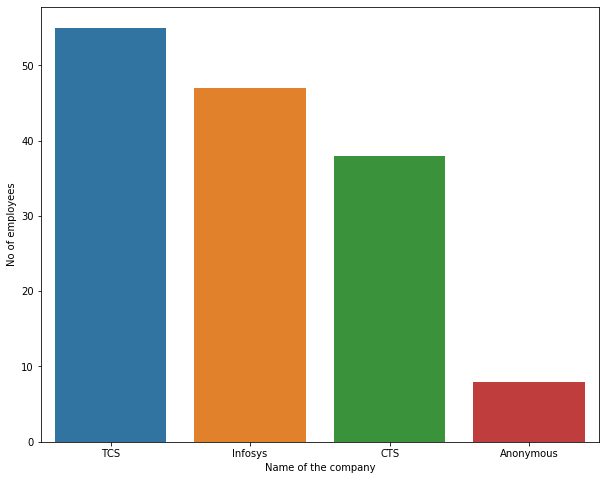

In [52]:
plt.figure(figsize = (10,8))
sns.barplot(x=company['Company'].value_counts().index, y=company['Company'].value_counts())
plt.xlabel('Name of the company')
plt.ylabel('No of employees')

In [15]:
company['Company'].value_counts()

TCS          55
Infosys      47
CTS          38
Anonymous     8
Name: Company, dtype: int64

Text(0, 0.5, 'No of employees')

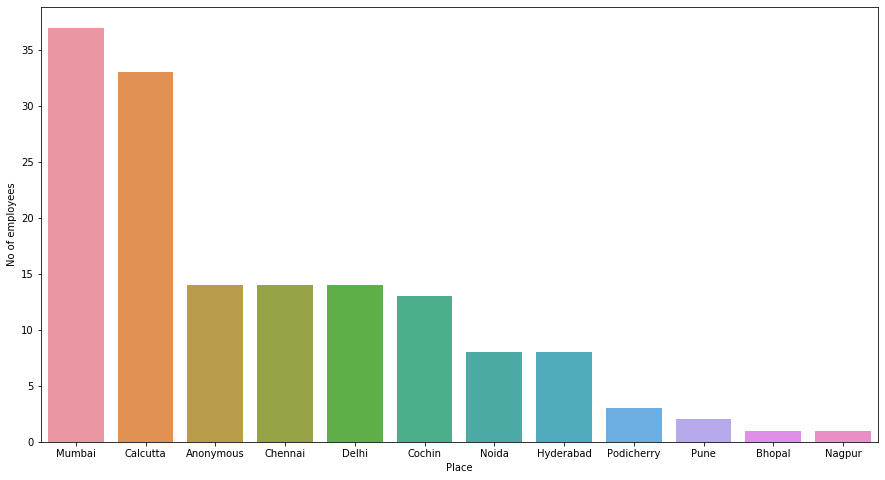

In [54]:
plt.figure(figsize = (15,8))
sns.barplot(x=company['Place'].value_counts().index, y=company['Place'].value_counts())
plt.xlabel('Place')
plt.ylabel('No of employees')

In [17]:
company['Place'].value_counts()

Mumbai        37
Calcutta      33
Anonymous     14
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64

Text(0, 0.5, 'No of employees')

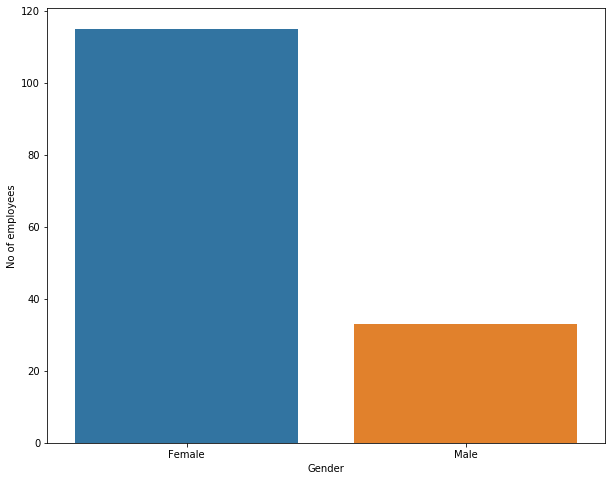

In [18]:
plt.figure(figsize = (10,8))
sns.barplot(x=company['Gender'].value_counts().index, y=company['Gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('No of employees')

In [19]:
company['Gender'].value_counts()

Female    115
Male       33
Name: Gender, dtype: int64

Text(0, 0.5, 'Salary')

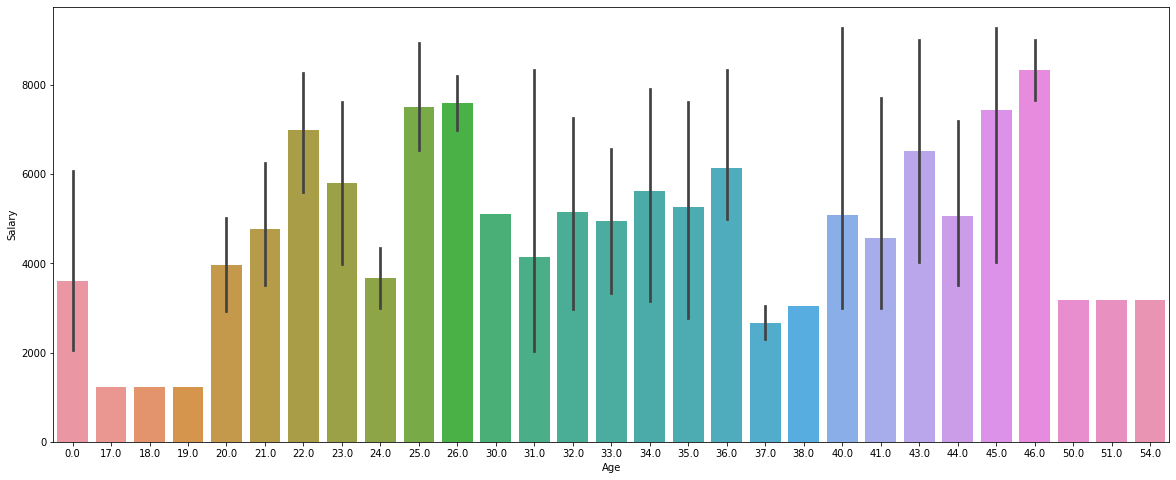

In [20]:
plt.figure(figsize = (20,8))
sns.barplot(x=company['Age'], y=company['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

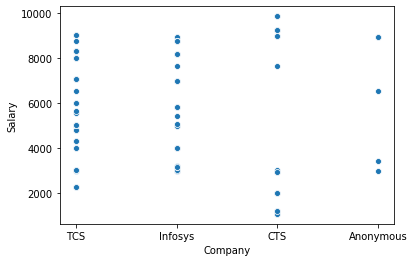

In [49]:
sns.scatterplot(x=company['Company'],y=company['Salary'])

In [30]:
company_place = pd.get_dummies(data = company[['Company','Place']],columns = ['Place']).groupby(by='Company').sum()
company_place

,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
Company,,,,,,,,,,,
CTS,0,7,3,4,2,3,9,0,1,2,2
Congnizant,0,0,0,0,0,0,1,0,1,0,0
Infosys,1,11,3,5,6,3,11,0,1,1,0
Infosys Pvt Lmt,0,0,1,0,0,0,1,0,0,0,0
TCS,0,13,6,4,5,1,13,1,4,0,0
Tata Consultancy Services,0,0,0,0,0,0,1,0,0,0,0


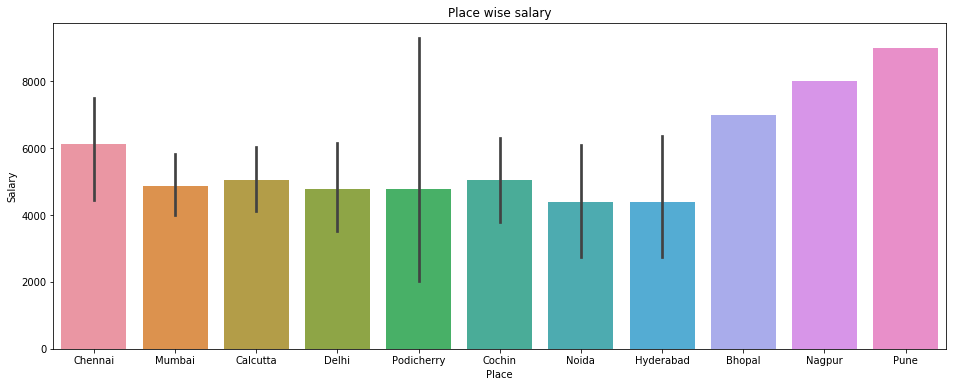

In [32]:
plt.figure(figsize=(16,6))
plt.title("Place wise salary")
sns.barplot(x=company['Place'],y=company['Salary'])

In [ ]:
company

In [40]:
# Places of maximum & minumum employees in each company
print('Maximum Employess :\n',company_place.idxmax(axis=1))
print('Minimum Employess :\n',company_place.idxmin(axis=1))

Maximum Employess :
 Company
CTS                            Place_Mumbai
Congnizant                     Place_Mumbai
Infosys                      Place_Calcutta
Infosys Pvt Lmt               Place_Chennai
TCS                          Place_Calcutta
Tata Consultancy Services      Place_Mumbai
dtype: object
Minimum Employess :
 Company
CTS                          Place_Bhopal
Congnizant                   Place_Bhopal
Infosys                      Place_Nagpur
Infosys Pvt Lmt              Place_Bhopal
TCS                          Place_Bhopal
Tata Consultancy Services    Place_Bhopal
dtype: object


In [34]:
company.groupby(['Company'])['Salary'].mean()

Company
CTS                          4714.840000
Congnizant                   2934.000000
Infosys                      5191.317073
Infosys Pvt Lmt              8202.000000
TCS                          5493.319149
Tata Consultancy Services    8345.000000
Name: Salary, dtype: float64

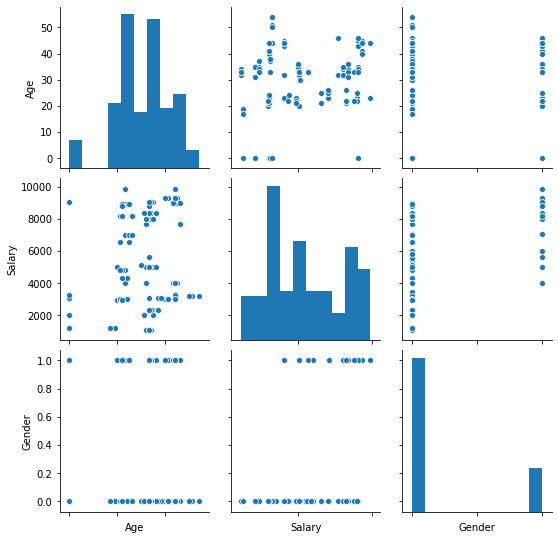

In [57]:
g = sns.pairplot(company)
g.set(xticklabels = [])

Text(0, 0.5, 'Salary')

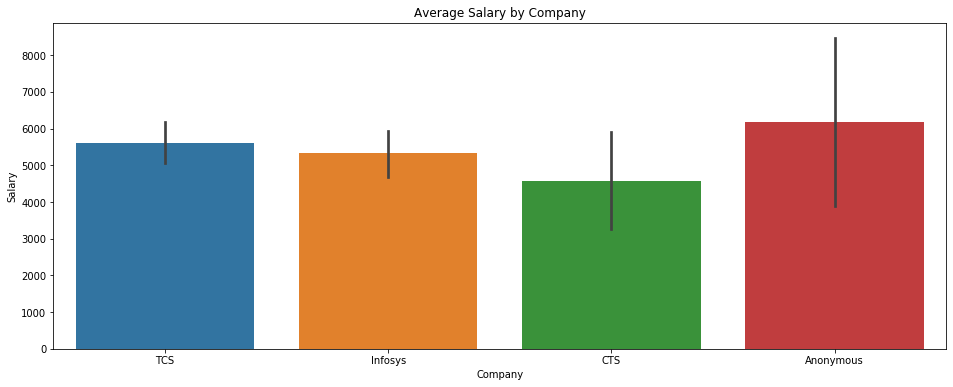

In [61]:
plt.figure(figsize=(16,6))
plt.title("Average Salary by Company")
sns.barplot(x = company['Company'],  y = company['Salary'])
plt.ylabel("Salary")